In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

#Create SQLAlchemy engine to connect to SQLite database
engine = create_engine("sqlite:///open_university_small.sqlite")
engine1 = create_engine("sqlite:///open_university.sqlite")

In [3]:
#Query to select data from 'studentInfo' table
query = "SELECT * FROM studentInfo"
query1 = "SELECT * FROM studentRegistration"
query2 = "SELECT * FROM studentAssessment"
query3 = "SELECT * FROM studentVle"

#Read data from 'studentInfo' table in dataframe
df = pd.read_sql_query(query, engine)
df_reg = pd.read_sql_query(query1, engine)
df_asses = pd.read_sql_query(query2, engine)
df_click = pd.read_sql_query(query3, engine1)


#Close SQLAlchemy engine
engine.dispose()
engine1.dispose()

In [4]:
#Display assesments dataframe
df_asses.head()

,index,id_assessment,id_student,date_submitted,is_banked,score
0,0,1752,11391,18,0,78.0
1,1,1752,28400,22,0,70.0
2,2,1752,31604,17,0,72.0
3,3,1752,32885,26,0,69.0
4,4,1752,38053,19,0,79.0


In [5]:
#assessments dataframe info
df_asses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           173912 non-null  int64  
 1   id_assessment   173912 non-null  int64  
 2   id_student      173912 non-null  int64  
 3   date_submitted  173912 non-null  int64  
 4   is_banked       173912 non-null  int64  
 5   score           173739 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 8.0 MB


In [6]:
#create new assessments dataframe with rows that have 'date_submitted" less than 91
df_asses1 = df_asses[df_asses['date_submitted'] < 91]
df_asses1.describe()

,index,id_assessment,id_student,date_submitted,is_banked,score
count,71051.000000,71051.000000,7.105100e+04,71051.000000,71051.000000,70991.000000
mean,78970.332085,25665.434533,7.098851e+05,42.953864,0.026868,76.550027
std,45710.767188,8451.721443,5.649305e+05,23.796862,0.161699,18.902731
min,0.000000,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,40428.500000,15020.000000,4.985800e+05,21.000000,0.000000,67.000000
50%,77885.000000,25349.000000,5.815740e+05,45.000000,0.000000,80.000000
75%,116555.500000,34873.000000,6.343490e+05,60.000000,0.000000,90.000000
max,173239.000000,37442.000000,2.698588e+06,90.000000,1.000000,100.000000


In [7]:
#create a new dataframe that groups the data by 'id_student' and sums 'score'
df_asses2 = df_asses1.groupby('id_student')['score'].sum().reset_index()
df_asses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23271 entries, 0 to 23270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  23271 non-null  int64  
 1   score       23271 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 363.7 KB


In [8]:
#Display click dataframe
df_click.head()

,index,code_module,code_presentation,id_student,id_site,date,sum_click
0,0,AAA,2013J,28400,546652,-10,4
1,1,AAA,2013J,28400,546652,-10,1
2,2,AAA,2013J,28400,546652,-10,1
3,3,AAA,2013J,28400,546614,-10,11
4,4,AAA,2013J,28400,546714,-10,1


In [9]:
#create new click dataframe with rows that have 'date' less than 261
df_click1 = df_click[df_click['date'] < 261]
df_click1.describe()

,index,id_student,id_site,date,sum_click
count,1.064176e+07,1.064176e+07,1.064176e+07,1.064176e+07,1.064176e+07
mean,5.327445e+06,7.333192e+05,7.382550e+05,9.495913e+01,3.719232e+00
std,3.075348e+06,5.827034e+05,1.312215e+05,7.588017e+01,8.853162e+00
min,0.000000e+00,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,2.663547e+06,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.327396e+06,5.882330e+05,7.300680e+05,8.600000e+01,2.000000e+00
75%,7.989792e+06,6.464820e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,1.065508e+07,2.698588e+06,1.049562e+06,2.600000e+02,6.977000e+03


In [10]:
#create a new dataframe that groups the data by 'id_student' and sums 'sum_click'
df_click2 = df_click1.groupby('id_student')['sum_click'].sum().reset_index()
df_click2.head()


,id_student,sum_click
0,6516,2789
1,8462,656
2,11391,934
3,23629,161
4,23698,910


In [11]:
#check df_asses2 and df_click2 for missing values
print(f'{df_asses2.isnull().sum()}')
print(f'{df_click2.isnull().sum()}')

id_student    0
score         0
dtype: int64
id_student    0
sum_click     0
dtype: int64


In [12]:
#merge df_asses2 and df_click2 dataframes on 'id_student'
df_merge_click_asses = pd.merge(df_asses2, df_click2, on='id_student', how='inner')
df_merge_click_asses.head()

,id_student,score,sum_click
0,6516,108.0,2789
1,8462,609.0,656
2,11391,163.0,934
3,23629,230.0,161
4,23698,265.0,910


In [13]:
#describe the merged dataframe
df_merge_click_asses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 23247
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  23248 non-null  int64  
 1   score       23248 non-null  float64
 2   sum_click   23248 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 726.5 KB


<Axes: >

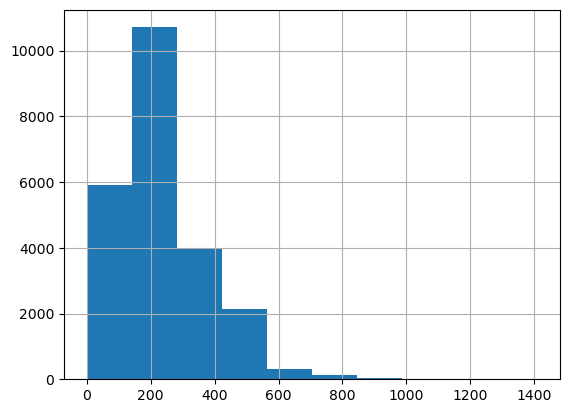

In [14]:
#histogram of 'score' column
df_merge_click_asses['score'].hist()

<Axes: >

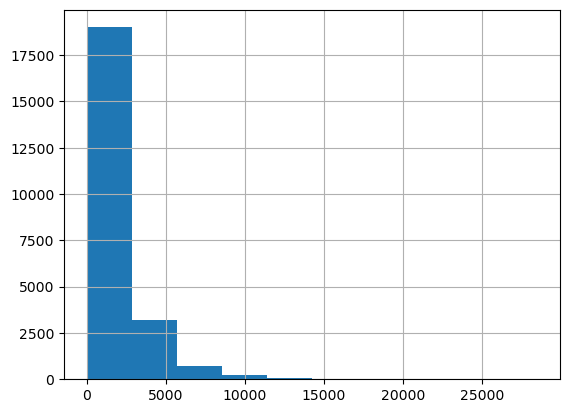

In [15]:
#histogram of 'sum_click' column
df_merge_click_asses['sum_click'].hist()

In [16]:
#Display registration dataframe
df_reg.head()

,index,code_module,code_presentation,id_student,date_registration,date_unregistration
0,0,AAA,2013J,11391,-159.0,NaN
1,1,AAA,2013J,28400,-53.0,NaN
2,2,AAA,2013J,30268,-92.0,12.0
3,3,AAA,2013J,31604,-52.0,NaN
4,4,AAA,2013J,32885,-176.0,NaN


In [17]:
#dataframe info
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                32593 non-null  int64  
 1   code_module          32593 non-null  object 
 2   code_presentation    32593 non-null  object 
 3   id_student           32593 non-null  int64  
 4   date_registration    32548 non-null  float64
 5   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [18]:
#number of rows in each column
df_reg.count()

index                  32593
code_module            32593
code_presentation      32593
id_student             32593
date_registration      32548
date_unregistration    10072
dtype: int64

<Axes: >

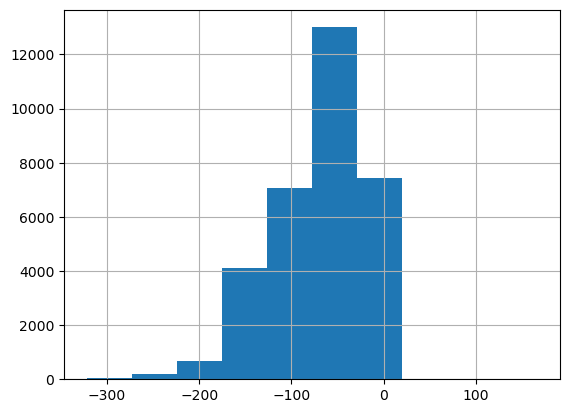

In [19]:
#histrogram of registration date
df_reg['date_registration'].hist()


In [20]:
#describe date_registration column
df_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

<Axes: >

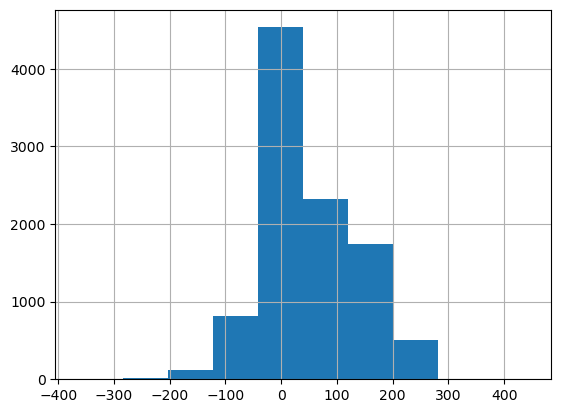

In [21]:
#histogram of date_unregistration
df_reg['date_unregistration'].hist()

In [22]:
#Display dataframe
df.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [23]:
#merge df and df_reg on 'id_student' column
merge_df = pd.merge(df, df_reg, on='id_student')
merge_df.head()

,index_x,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,AAA,2013J,-159.0,NaN
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,AAA,2013J,-53.0,NaN
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,AAA,2013J,-92.0,12.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3,AAA,2013J,-52.0,NaN
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,4,AAA,2013J,-176.0,NaN


In [24]:
#merge df_merge_click_asses and merge_df on 'id_student' column
final_merge = pd.merge(df_merge_click_asses, merge_df, on='id_student')
final_merge.head()

,id_student,score,sum_click,index_x,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,6516,108.0,2789,383,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,383,AAA,2014J,-52.0,NaN
1,8462,609.0,656,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
2,8462,609.0,656,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,17560,DDD,2014J,-38.0,18.0
3,8462,609.0,656,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
4,8462,609.0,656,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,17560,DDD,2014J,-38.0,18.0


In [25]:
#create new dataframe with relevant columns
demo_df = final_merge[['score','sum_click','date_registration','code_module_x', 'region', 'highest_education', 'imd_band', 'age_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']]
demo_df.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,Pass
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn


In [26]:
#dataframe info
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33892 entries, 0 to 33891
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 33892 non-null  float64
 1   sum_click             33892 non-null  int64  
 2   date_registration     33874 non-null  float64
 3   code_module_x         33892 non-null  object 
 4   region                33892 non-null  object 
 5   highest_education     33892 non-null  object 
 6   imd_band              32606 non-null  object 
 7   age_band              33892 non-null  object 
 8   gender                33892 non-null  object 
 9   num_of_prev_attempts  33892 non-null  int64  
 10  studied_credits       33892 non-null  int64  
 11  disability            33892 non-null  object 
 12  final_result          33892 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.6+ MB


In [27]:
#number of rows in each column
demo_df.count()

score                   33892
sum_click               33892
date_registration       33874
code_module_x           33892
region                  33892
highest_education       33892
imd_band                32606
age_band                33892
gender                  33892
num_of_prev_attempts    33892
studied_credits         33892
disability              33892
final_result            33892
dtype: int64

In [28]:
#number of null values in each column
demo_df.isnull().sum()

score                      0
sum_click                  0
date_registration         18
code_module_x              0
region                     0
highest_education          0
imd_band                1286
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [29]:
#unique values in each column
demo_df.nunique()

score                    805
sum_click               5546
date_registration        319
code_module_x              7
region                    13
highest_education          5
imd_band                  10
age_band                   3
gender                     2
num_of_prev_attempts       7
studied_credits           52
disability                 2
final_result               4
dtype: int64

In [30]:
#values in each column
col_list = ['region', 'highest_education', 'imd_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'age_band', 'disability', 'final_result']
for i in col_list:
    print(demo_df[i].unique())

['Scotland' 'London Region' 'East Anglian Region' 'Wales'
 'Yorkshire Region' 'East Midlands Region' 'South Region'
 'North Western Region' 'South East Region' 'South West Region'
 'West Midlands Region' 'North Region' 'Ireland']
['HE Qualification' 'Lower Than A Level' 'A Level or Equivalent'
 'Post Graduate Qualification' 'No Formal quals']
['80-90%' '30-40%' '90-100%' '20-30%' '50-60%' '10-20' '40-50%' '60-70%'
 '70-80%' '0-10%' None]
['M' 'F']
[0 1 2 4 3 5 6]
[ 60  90 240 120  30 150  70 180 105  50 300 270 160 110  40  80 210 140
 115 220  75 135 165 100 200 310 130 145  45 430 345 420 225 170 235 250
 280 325 215  55 255 195 155 360  95 190  65 330  85 630 355 205]
['55<=' '0-35' '35-55']
['N' 'Y']
['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [31]:
#remove rows with null values
demo_df.dropna()
demo_df.isnull().sum()

score                      0
sum_click                  0
date_registration         18
code_module_x              0
region                     0
highest_education          0
imd_band                1286
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [32]:
#remove rows with null values
demo_df = demo_df.dropna()

In [33]:
#convert final_result to numerical data. 1 = Distinction or Pass, 0 = Fail or Withdrawn
demo_df_n=demo_df.replace(['Pass', 'Withdrawn', 'Fail', 'Distinction'], [1, 0, 0, 1])
demo_df_n.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,1
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,0
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,0
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,0
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,0


In [34]:
#convert 55<= age_band values to 55
demo_df_n['age_band'] = demo_df_n['age_band'].replace('55<=', '55')
demo_df_n['age_band'].unique()

array(['55', '0-35', '35-55'], dtype=object)

In [35]:
#convert age_band to 1,2,3 
demo_df_n['age_band'] = demo_df_n['age_band'].replace(['0-35', '35-55', '55'], [1, 2, 3])
demo_df_n['age_band'].unique()

array([3, 1, 2])

In [36]:
#replace 10-20 in 'imd_band' to 10-20%
demo_df_n['imd_band'] = demo_df_n['imd_band'].replace('10-20', '10-20%')
#check if the change has been made
demo_df_n['imd_band'].unique()

array(['80-90%', '30-40%', '90-100%', '20-30%', '50-60%', '10-20%',
       '40-50%', '60-70%', '70-80%', '0-10%'], dtype=object)

In [37]:
#look at studied_credits value counts for binning
studied_credits_counts = demo_df_n['studied_credits'].value_counts()
studied_credits_counts

60     16545
120     6011
90      3780
30      3554
150      901
180      818
240      222
210      153
75       106
70        88
270       41
135       40
130       39
45        33
300       31
100       31
80        24
40        20
110       14
160       14
195       11
105       11
190        9
165        8
140        7
220        7
170        6
330        6
145        6
50         5
115        5
360        4
85         4
250        4
55         4
225        3
95         3
345        2
310        2
200        2
255        2
235        2
420        1
155        1
215        1
325        1
65         1
280        1
430        1
630        1
355        1
205        1
Name: studied_credits, dtype: int64

In [38]:
#choose cutoff value and create list of studied_credits to be replaced
replace_studied_credits = list(studied_credits_counts[studied_credits_counts < 700].index)

#replace studied_credits values with 'Other'
for x in replace_studied_credits:
    demo_df_n['studied_credits'] = demo_df_n['studied_credits'].replace(x, 'Other')

#check if the change has been made
demo_df_n['studied_credits'].value_counts()

60       16545
120       6011
90        3780
30        3554
Other      979
150        901
180        818
Name: studied_credits, dtype: int64

In [39]:
#check row count of the dataframe
demo_df_n.count()


score                   32588
sum_click               32588
date_registration       32588
code_module_x           32588
region                  32588
highest_education       32588
imd_band                32588
age_band                32588
gender                  32588
num_of_prev_attempts    32588
studied_credits         32588
disability              32588
final_result            32588
dtype: int64

In [40]:
#check final dataframe
demo_df_n.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,3,M,0,60,N,1
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,3,M,0,90,N,0
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,3,M,0,90,N,0
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,3,M,1,60,N,0
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,3,M,1,60,N,0


In [41]:
#export dataframe to pickle file
demo_df_n.to_pickle('demo_df_n.pkl')

MODELS

In [42]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


logistic regression

In [43]:
# Split the data into X (feature) and y (target)
y = demo_df_n['final_result']
X = demo_df_n.drop(columns=['final_result'])

#Encode the categorical data 
X = pd.get_dummies(X)

# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9, max_iter=1000, solver='newton-cg')

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print('training_matrix:')
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print('test_matrix:')
print(test_matrix)

# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print('training_report:')
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print('testing_report:')
print(testing_report)

training_matrix:
[[ 7877  3520]
 [ 2944 10100]]
test_matrix:
[[2663 1166]
 [ 981 3337]]
training_report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     11397
           1       0.74      0.77      0.76     13044

    accuracy                           0.74     24441
   macro avg       0.73      0.73      0.73     24441
weighted avg       0.74      0.74      0.73     24441

testing_report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      3829
           1       0.74      0.77      0.76      4318

    accuracy                           0.74      8147
   macro avg       0.74      0.73      0.73      8147
weighted avg       0.74      0.74      0.74      8147



decision tree

In [44]:
# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.80


random forest

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3089,716
Actual 1,537,3805


Accuracy Score : 0.8462010556032895
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3805
           1       0.84      0.88      0.86      4342

    accuracy                           0.85      8147
   macro avg       0.85      0.84      0.85      8147
weighted avg       0.85      0.85      0.85      8147



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

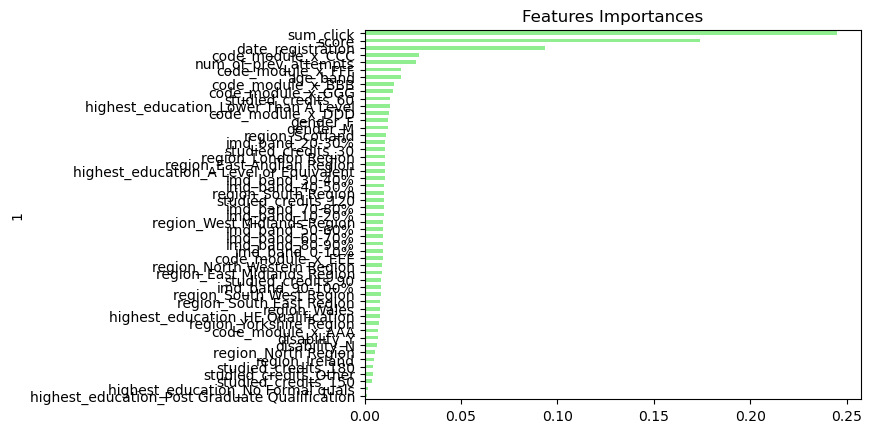

In [45]:
# Define features set
X = demo_df_n.copy()
X.drop("final_result", axis=1, inplace=True)

#Encode the categorical data 
X = pd.get_dummies(X)

 # Define target vector
y = demo_df_n["final_result"].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 # Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

neutral network

In [46]:
# Convert categorical data to numeric with `pd.get_dummies`
category_convert = pd.get_dummies(demo_df_n)

# Split our preprocessed data into our features and target arrays
y = category_convert["final_result"].values
X = category_convert.drop(["final_result"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Function to create model
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn


/var/folders/t4/k2tbzzpn1hsdycb190cq1m5w0000gn/T/ipykernel_61024/3738965723.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = category_convert.drop(["final_result"],1).values


In [47]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

Reloading Tuner from ./untitled_project/tuner0.json


{'activation': 'relu',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 5,
 'units_2': 3,
 'units_3': 3,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [48]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


255/255 - 0s - 635us/step - accuracy: 0.7162 - loss: 0.5583
Loss: 0.5583372712135315, Accuracy: 0.7162145376205444


Decision tree XGBoost

Accuracy: 82.14%


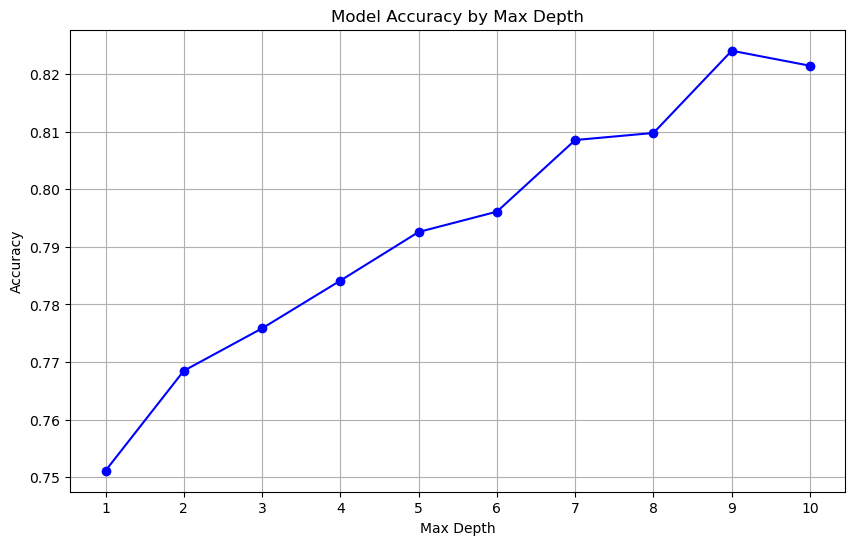

In [49]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying max_depth for example
depths = range(1, 11)  
accuracies = []

for depth in depths:
    model = xgb.XGBClassifier(max_depth=depth, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)  
plt.show()
